In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
#The data include a binomial column with 1 as flood point and 0 as no flood

In [72]:
dataset = pd.read_csv(r"C:\Users\a.amanambu\Desktop\data_R\Project22_results\data_extact.csv")
X = dataset.iloc[:, 4:14].values
y = dataset.iloc[:, 1].values

In [74]:
dataset.shape

(316, 14)

In [60]:
X

array([[ 1.07131e+01, -3.33333e-01,  1.90394e+03, ...,  9.07000e+02,
         1.69428e+01,  5.99245e+00],
       [ 2.91038e+02,  2.22222e-01,  1.17266e+03, ...,  8.74000e+02,
         3.22466e+00,  0.00000e+00],
       [ 1.96928e+02, -1.11111e-01,  1.44846e+03, ...,  1.01100e+03,
         5.55446e+00,  5.31620e+00],
       ...,
       [ 5.52750e+00,  4.44444e-01,  6.65656e+02, ...,  1.53400e+03,
         1.41420e+01,  4.38148e+00],
       [ 3.06104e+02,  2.22222e-01,  2.93165e+02, ...,  1.40200e+03,
         3.36584e+01,  2.82024e+00],
       [ 3.60983e+01, -3.33333e-01,  6.86143e+02, ...,  1.46100e+03,
         2.56685e+01,  4.70117e+00]])

In [75]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

 We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points

In [76]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
#Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [78]:
#test the prediction

print(classifier.predict(sc.transform([[94.2364, -0.111111, 30.9023, 0.01424570, 2088, 0.251390, 0.569156, 1225, 12.35430, 3.82352]])))

[1]


In [79]:
#predict the testing samples
y_pred = classifier.predict(X_test)

In [80]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 3 18]
 [ 6 37]]


In [81]:
#precision, recall, F1score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.14      0.20        21
           1       0.67      0.86      0.76        43

    accuracy                           0.62        64
   macro avg       0.50      0.50      0.48        64
weighted avg       0.56      0.62      0.57        64



In [82]:
#WHICH IS Essentailly Flood SUSCEPTIBILITY. To do this ,
# call the probabilities ofthe model instal of the predict function from the model

y_prob = classifier.predict_proba(X_test)

Next, I calculate the ROC curve and plot the result using Matplotlib. The roc_curve() function produces multiple outputs at once using tuple unpacking.

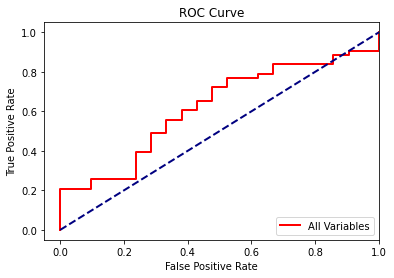

In [84]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,  y_prob[:, 1])
plt.plot(fpr,tpr, color ='red', lw=2, label="All Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
#plt.show()
plt.savefig('ROC')

# Run with Random Forest and Compare

In [111]:
# I am bringing in the data again because i wnat to use an unscaled data. The log model was scaled but this is not.

dataset = pd.read_csv(r"C:\Users\a.amanambu\Desktop\data_R\Project22_results\data_extact.csv")
X = dataset.iloc[:, 4:14].values
y = dataset.iloc[:, 1].values

# training and testing samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#Here are Parameters currently in use. Pleasae look up the Scickit learn Documentation
####Parameters currently in use:

# {'bootstrap': True,
#  'criterion': 'mse',
#  'max_depth': None,
#  'max_features': 'auto',
#  'max_leaf_nodes': None,
#  'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 10,
#  'n_jobs': 1,
#  'oob_score': False,
#  'random_state': None,
#  'verbose': 0,
#  'warm_start': False}

# Define the parameters
GridParams = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}

RandomForest = RandomForestClassifier()

#Define the grid search parameters using a 3-fold cross validation

GridSearch = GridSearchCV(estimator = RandomForest, param_grid = GridParams, cv = 3, n_jobs = -1, verbose = 2)


In [113]:
GridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=2)

In [115]:
#What are the best parameter
GridSearch.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [116]:
#Use the generated estimator
RandomForest_model = GridSearch.best_estimator_
print(RandomForest_model)
RandomForest_pred = RandomForest_model.predict(X_test)

RandomForestClassifier(max_depth=50, max_features=3, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200)


In [122]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, RandomForest_pred))

[[17  4]
 [ 9 34]]


In [123]:
#precision, recall, F1score
from sklearn.metrics import classification_report
print(classification_report(y_test, RandomForest_pred))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.89      0.79      0.84        43

    accuracy                           0.80        64
   macro avg       0.77      0.80      0.78        64
weighted avg       0.82      0.80      0.80        64



In [124]:
#probabilities
#WHICH IS Essentailly Flood SUSCEPTIBILITY. To do this ,
# call the probabilities ofthe model instal of the predict function from the model
y_prob = RandomForest_model.predict_proba(X_test)

In [125]:
#AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob[:,1])

0.8261351052048727

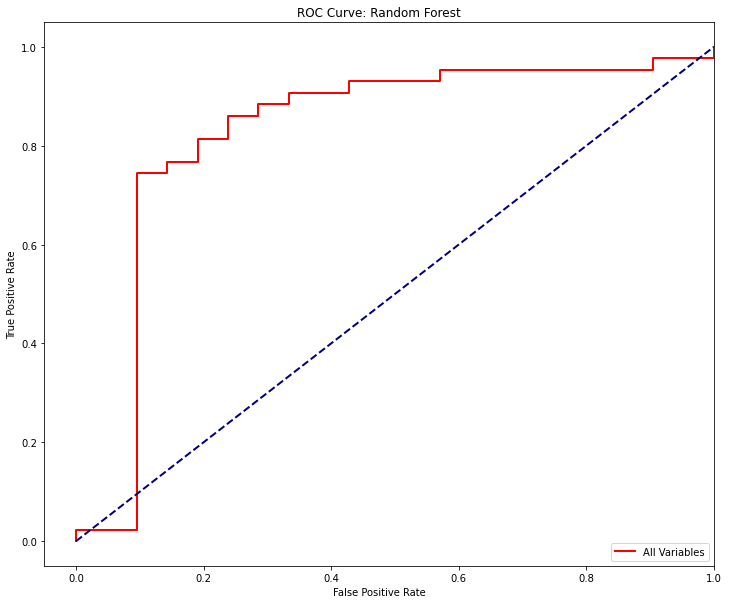

In [134]:
#Plot ROC Curve for Random Forest

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,  y_prob[:, 1])
plt.plot(fpr,tpr, color ='red', lw=2, label="All Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend(loc="lower right")
plt.show()
#plt.savefig('ROC')

# Predict the models on Raster Data

In [130]:
from pyspatialml import Raster

In [131]:
from glob import glob
import os
data_dir = r"C:\Users\a.amanambu\Desktop\data_R\Resampled"
file_list = glob(os.path.join(data_dir, '*.tif'))
# data_array = []
# for raster in file_list:
#     data_array.append()

r_preds = Raster(file_list)

In [132]:
print(r_preds.names)

['aspect', 'curvature', 'driver', 'Droad', 'elevation', 'NDSI', 'NDVI', 'rainfall', 'slope', 'TWI']


In [135]:
result = r_preds.predict_proba(estimator = RandomForest_model)

In [136]:
result.write(r"C:\Users\a.amanambu\Desktop\data_R\Project22_results\result.tif")

In [114]:
#I made a map for the sake of visualisation but do most of my visualisation in aRCgIS

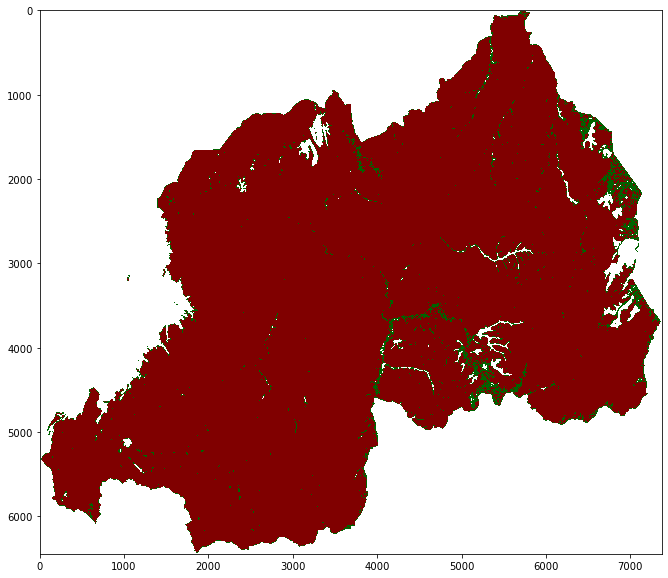

In [139]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import rasterio as rio

#create color Ramps
colors = ['white', 'darkgreen', 'maroon']
class_bins = [.35, .65, 1.0]
cmap = ListedColormap(colors)

#Make the plot          
m_result = rio.open(r"C:\Users\a.amanambu\Desktop\data_R\Project22_results\result.tif")
m_result_arr = m_result.read(2)
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(m_result_arr, cmap = cmap)